In [247]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [248]:
x_value = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
y_value = np.array([0, 2, 3, 2, 2.5, -1, 2, 5, 6, 3])

In [249]:
A = np.column_stack((np.ones(len(x_value)), x_value))
y = np.transpose(y_value)


In [250]:
# np.dot(np.transpose(A), A)
# np.linalg.inv(np.dot(np.transpose(A), A))
# np.dot(np.transpose(A), y)
b = np.dot(np.linalg.inv(np.dot(np.transpose(A), A)),np.dot(np.transpose(A), y))
print(b)

[0.77272727 0.03727273]


In [251]:
new_y = []
y_newy_dis = []
upper_points = []
lower_points = []
upper_vectors = []
upper_angles = []
lower_vectors = []
lower_angle = []

[4.0, -70]
(4, 2)
[0.77272727 0.03727273]
0.9998034851525308


C:\Users\PC\AppData\Local\Temp\ipykernel_1400\640403084.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b.-" (-> marker='.'). The keyword argument will take precedence.
  fig.plot(x_value, y_value, "b.-", linewidth=1.5, markersize=5, marker="s")


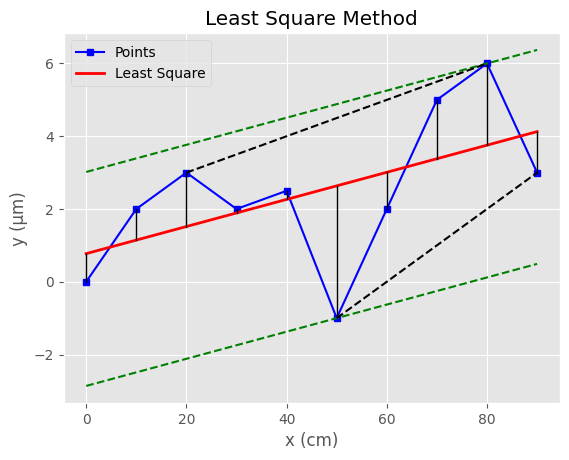

In [252]:
fig = plt.subplot()
fig.plot(x_value, y_value, "b.-", linewidth=1.5, markersize=5, marker="s")
fig.plot(x_value, b[0] + b[1]*x_value, "r", linewidth=2)
fig.legend(["Points", "Least Square"])


for x in x_value:
    new_y.append(b[0] + b[1] * x)
for i in range(0, len(x_value)):
    fig.plot([x_value[i], x_value[i]], [y_value[i], new_y[i]], color="black", linewidth=1)
    y_newy_dis.append(y_value[i]-new_y[i])

maximum_value_id = y_newy_dis.index(max(y_newy_dis))
minimum_value_id = y_newy_dis.index(min(y_newy_dis))


for point_id in range(len(y_newy_dis)):
    if y_newy_dis[point_id] >= 0: 
        upper_points.append(point_id)
        upper_vectors.append([y_value[maximum_value_id]-y_value[point_id], -x_value[maximum_value_id]+x_value[point_id]])
    else: 
        lower_points.append(point_id)
        lower_vectors.append([y_value[minimum_value_id]-y_value[point_id], -x_value[minimum_value_id]+x_value[point_id]])
LS_vector = [b[1], -1]
angle = np.dot(LS_vector, upper_vectors[0]) / (np.linalg.norm(LS_vector) * np.linalg.norm(upper_vectors[0]))
print(upper_vectors[0])
print(np.shape(lower_vectors))
print(b)
print(angle)

fig.plot(x_value, b[1]*x_value + y_value[maximum_value_id] - b[1]*x_value[maximum_value_id], "g--")
fig.plot(x_value, b[1]*x_value + y_value[minimum_value_id] - b[1]*x_value[minimum_value_id], "g--")
fig.plot([x_value[2], x_value[maximum_value_id]], [y_value[2], y_value[maximum_value_id]], ls="--", color="black")
fig.plot([x_value[minimum_value_id], x_value[9]], [y_value[minimum_value_id], y_value[9]], ls="--", color="black")

fig.set_title("Least Square Method")
fig.set_xlabel("x (cm)")
fig.set_ylabel("y (μm)")
plt.show()